<a href="https://colab.research.google.com/github/kwekumorgan/Group_1_Enhancement_Techniques/blob/main/Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Quantization**                
Image quantization is the process of mapping a large set of continuous or discrete intensity values to a smaller, finite set of intensity levels. It deals with intensity resolution i.e how many grey levels or colors are used to represent pixel values. In simple terms, quantization determines how accurately pixel values are represented.


# Practical Implementation

In [143]:

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# **Floor Method**

This method drops off the decimal and always moves the pixel value down to the start of the nearest intensity bin. It is mathematically simpler and faster for computers to calculate, but it usually makes the resulting image appear slightly darker than the original.

Step_Size = 256 / Levels
Quantized_Pixel = floor( Input_Pixel / Step_Size ) * Step_Size

**Definitions:**



*   Step_Size: The "gap" or distance between each color level.

*   floor: The rule to always round down (e.g., 1.9 becomes 1).

*   256: The total number of possible values (including 0).







In [144]:
# load grayscale image
gray_img = cv2.imread("/content/apple.png", cv2.IMREAD_GRAYSCALE)

In [152]:
#Quantization Function

# reduces the number of intensity levels in an image
def quantize_image(image, levels):
    step = 256 // levels
    return (image // step) * step



In [153]:
# Levels to test
levels_list = [16, 8, 4]


quantized_gray = []

# Loop through each level
for L in levels_list:
    result = quantize_image(gray_img, L)
    quantized_gray.append(result)

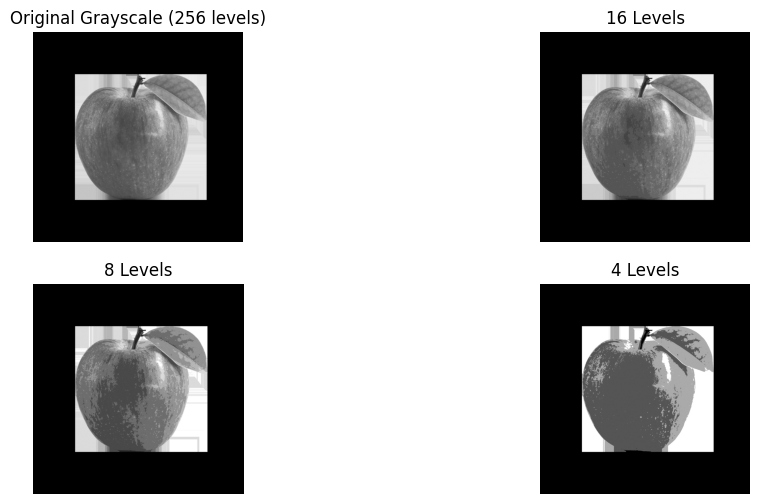

In [155]:
# Show all the grayscale images
plt.figure(figsize=(12, 6))

# Show the original grayscale image
plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale (256 levels)")
plt.axis('off')

# Show the 16 levels image
plt.subplot(2, 2, 2)
plt.imshow(quantized_gray[0], cmap='gray')
plt.title("16 Levels")
plt.axis('off')

# Show the 8 levels image
plt.subplot(2, 2, 3)
plt.imshow(quantized_gray[1], cmap='gray')
plt.title("8 Levels")
plt.axis('off')

# Show the 4 levels image
plt.subplot(2, 2, 4)
plt.imshow(quantized_gray[2], cmap='gray')
plt.title("4 Levels")
plt.axis('off')

# Display the final plot
plt.show()

# **The Rounding Method (Mid-Rise)**

This method maps each pixel to the nearest available intensity level. It is the most visually accurate method because it minimizes the "error" (the difference between the original color and the new color).

Formula:
Quantized_Pixel = round( (Levels - 1) * Input_Pixel / 255 ) * ( 255 / (Levels - 1) )


**Definitions:**



*   **round**: The rule to move to the closest whole number

*   **Input_Pixel**: The original color value (0–255).

*   **Levels**: The number of colors you want (e.g., 4, 8, or 16).

*   **255**: The maximum possible brightness for a standard image.







In [148]:
color_img = cv2.imread("/content/yellow_green_fruit.jpg")
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)


In [149]:
def quantize_coloured_image(image, levels):
    # Ensure levels is at least 2
    if levels < 2: return image

    # Convert to float
    img_float = image.astype(np.float32)

    # Map pixel values to the new discrete levels
    q = np.round((levels - 1) * img_float / 255.0)

    # Scale back to 0-255 range and convert to 8-bit integers
    res = (q * 255.0 / (levels - 1))
    return np.clip(res, 0, 255).astype(np.uint8)


In [150]:
# List of levels to apply
levels_list = [4, 8, 16]

# Create an empty list to store the results
quantized_color = []

# Loop through each level and add the result to list
for L in levels_list:
    new_img = quantize_coloured_image(color_img, L)
    quantized_color.append(new_img)

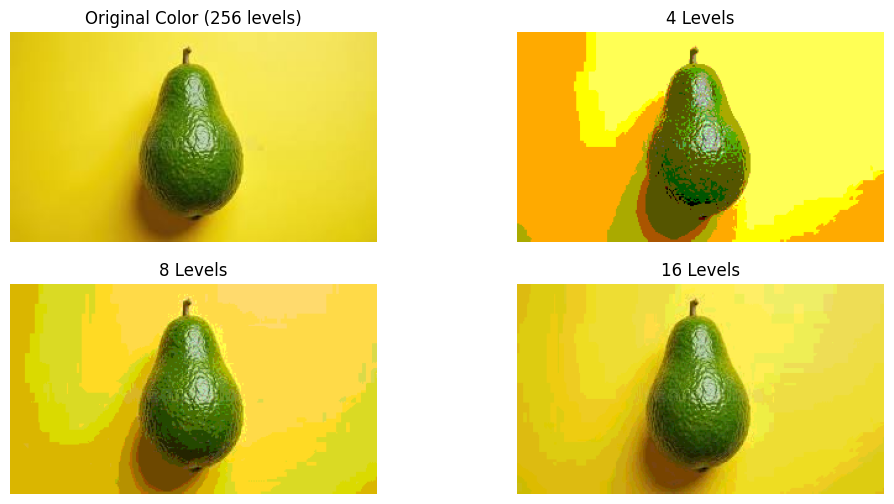

In [151]:
# Create the window for the images
plt.figure(figsize=(12, 6))

# Show the first image (Original)
plt.subplot(2, 2, 1)
plt.imshow(color_img)
plt.title("Original Color (256 levels)")
plt.axis('off')

# Show the second image (4 Levels)
plt.subplot(2, 2, 2)
plt.imshow(quantized_color[0])
plt.title("4 Levels")
plt.axis('off')

# Show the third image (8 Levels)
plt.subplot(2, 2, 3)
plt.imshow(quantized_color[1])
plt.title("8 Levels")
plt.axis('off')

# Show the fourth image (16 Levels)
plt.subplot(2, 2, 4)
plt.imshow(quantized_color[2])
plt.title("16 Levels")
plt.axis('off')

# Display everything
plt.show()